# 📈 XGBoost Regression Project

## 📚 Importing Libraries and  Data 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

In [3]:
df= sns.load_dataset("diamonds") 

In [4]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [5]:
df.tail()

,carat,cut,color,clarity,depth,table,price,x,y,z
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74
53939,0.75,Ideal,D,SI2,62.2,55.0,2757,5.83,5.87,3.64


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    53940 non-null  float64 
 1   cut      53940 non-null  category
 2   color    53940 non-null  category
 3   clarity  53940 non-null  category
 4   depth    53940 non-null  float64 
 5   table    53940 non-null  float64 
 6   price    53940 non-null  int64   
 7   x        53940 non-null  float64 
 8   y        53940 non-null  float64 
 9   z        53940 non-null  float64 
dtypes: category(3), float64(6), int64(1)
memory usage: 3.0 MB


In [7]:
df.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


## 📉 Exploratory Data Analysis and Visaulization

In [8]:
price_mean = df['price'].mean()  # mean price of diamonds
print(f"The average price of the diamonds is: ${price_mean:.2f}")

The average price of the diamonds is: $3932.80


In [9]:
price_median = df['price'].median() # median price of diamonds
print(f"The median price of the diamonds is: ${price_median:.2f}")

The median price of the diamonds is: $2401.00


In [10]:
price_var = df['price'].var() # variance of diamond prices
print(f"The variance of the diamond prices is: {price_var:.2f}")


The variance of the diamond prices is: 15915629.42


In [11]:
price_std = df['price'].std() # standard deviation of diamond prices
print(f"The standard deviation of the diamond prices is: {price_std:.2f}")

The standard deviation of the diamond prices is: 3989.44


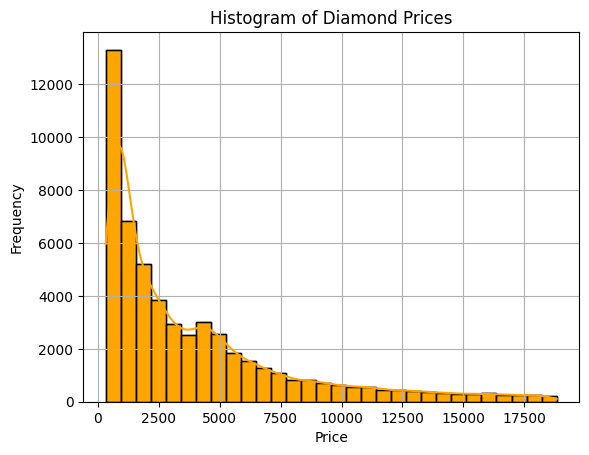

In [12]:
# Univariate Analysis


# Histogram for price  


df['price'].hist(bins=30, edgecolor='black', color='orange')  
plt.title('Histogram of Diamond Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
sns.histplot(df['price'], kde=True, bins=30, edgecolor='black', color='orange')
plt.show()

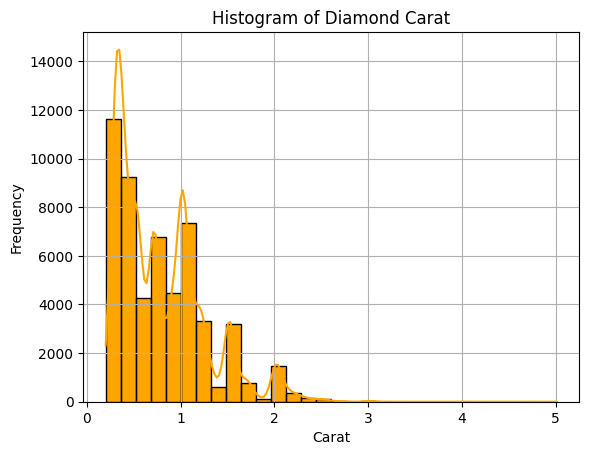

In [13]:
# Histogram for carat

df['carat'].hist(bins=30, color='orange')
plt.title('Histogram of Diamond Carat')
plt.xlabel('Carat')
plt.ylabel('Frequency')
sns.histplot(df['carat'], kde=True, bins=30, color='orange')

plt.show()

/tmp/ipykernel_3637/2770751087.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=column, palette='viridis')


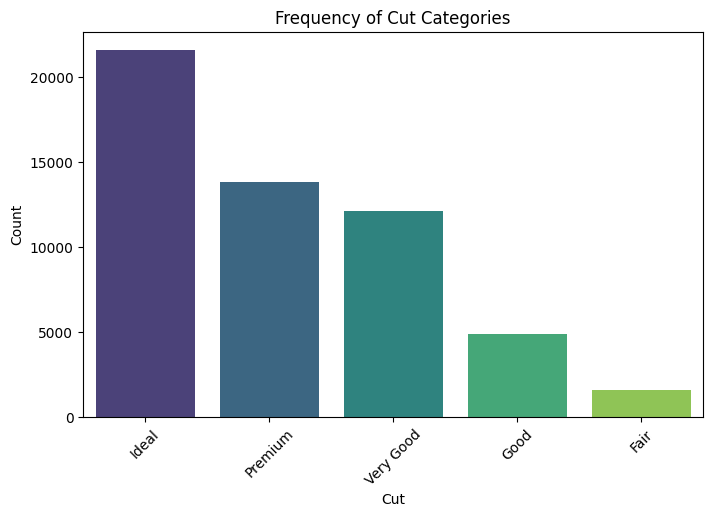

/tmp/ipykernel_3637/2770751087.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=column, palette='viridis')


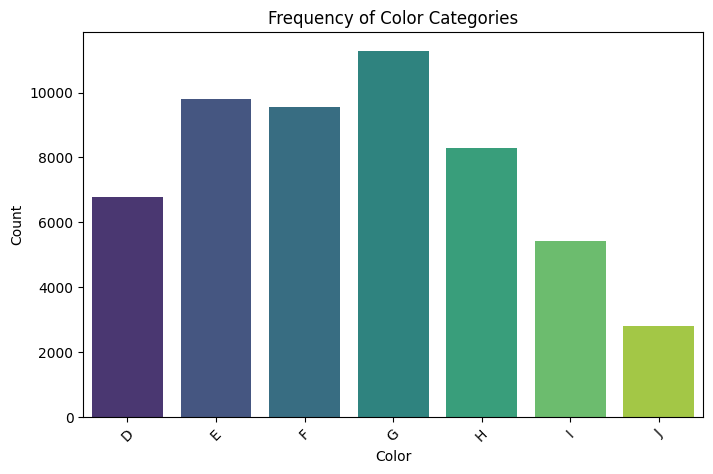

/tmp/ipykernel_3637/2770751087.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=column, palette='viridis')


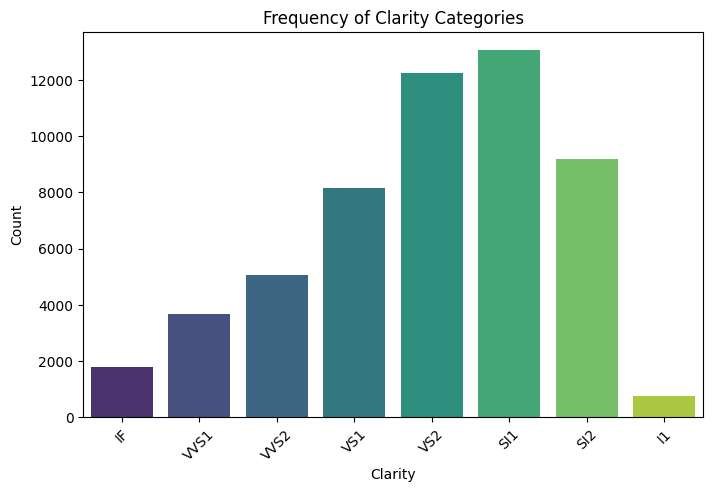

In [14]:
# Count plots for categorical features

categorical_columns = ['cut', 'color', 'clarity']

for column in categorical_columns:
    plt.figure(figsize=(8, 5))
    sns.countplot(data=df, x=column, palette='viridis')
    plt.title(f'Frequency of {column.capitalize()} Categories')
    plt.xlabel(column.capitalize())
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

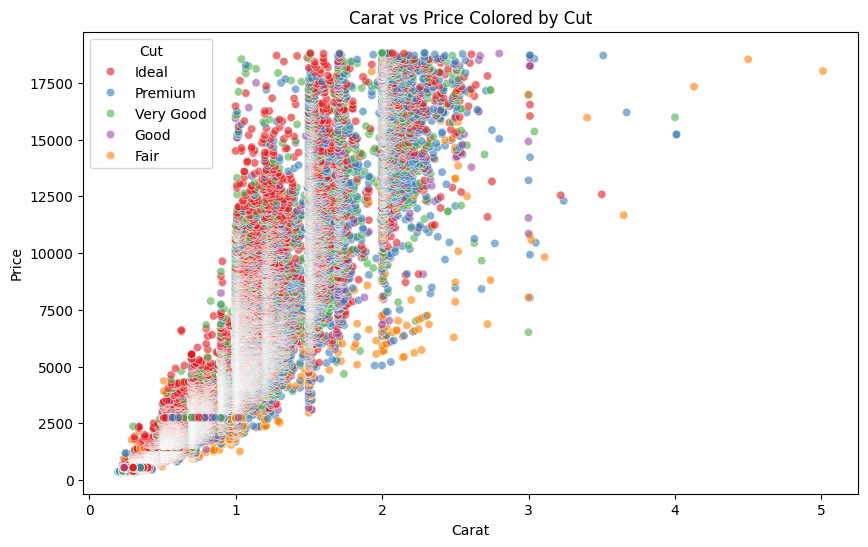

In [15]:
# Bivariate Analysis  

# Scatter plot for carat vs price
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='carat', y='price', hue='cut',
                palette='Set1', alpha=0.6)
plt.title('Carat vs Price Colored by Cut')
plt.xlabel('Carat')
plt.ylabel('Price')
plt.legend(title='Cut')
plt.show()



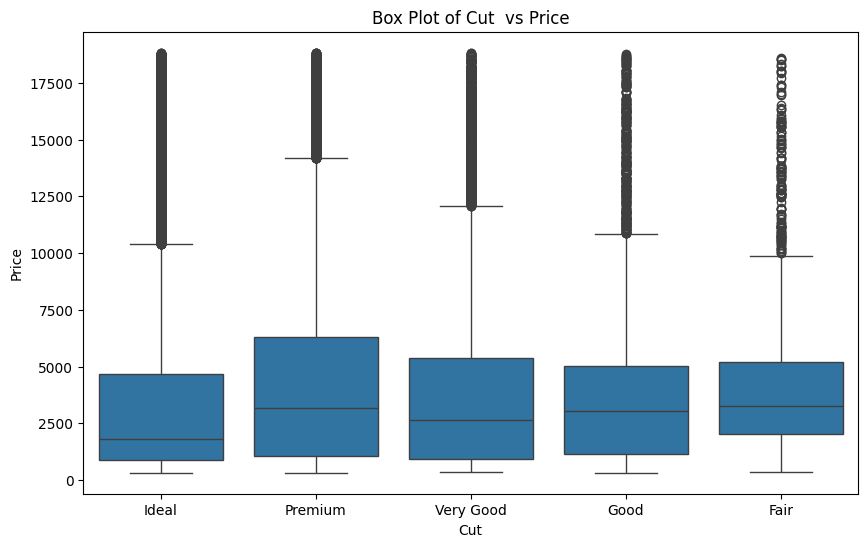

In [16]:
# Boxplot plot for cut  vs price

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='cut', y='price')
plt.title('Box Plot of Cut  vs Price')
plt.xlabel('Cut')
plt.ylabel('Price')
plt.show()


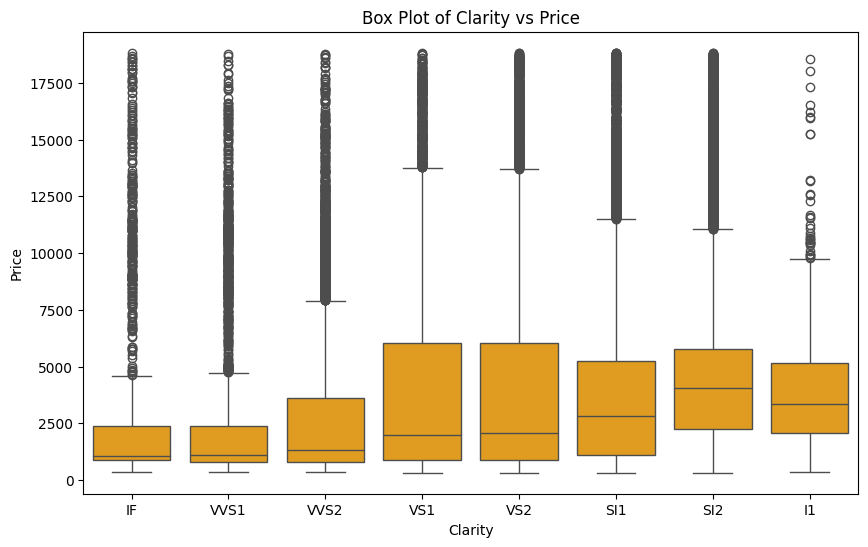

In [17]:
# Boxplot plot for clarity   vs price

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='clarity', y='price',color='orange')
plt.title('Box Plot of Clarity vs Price')
plt.xlabel('Clarity')
plt.ylabel('Price')
plt.show()

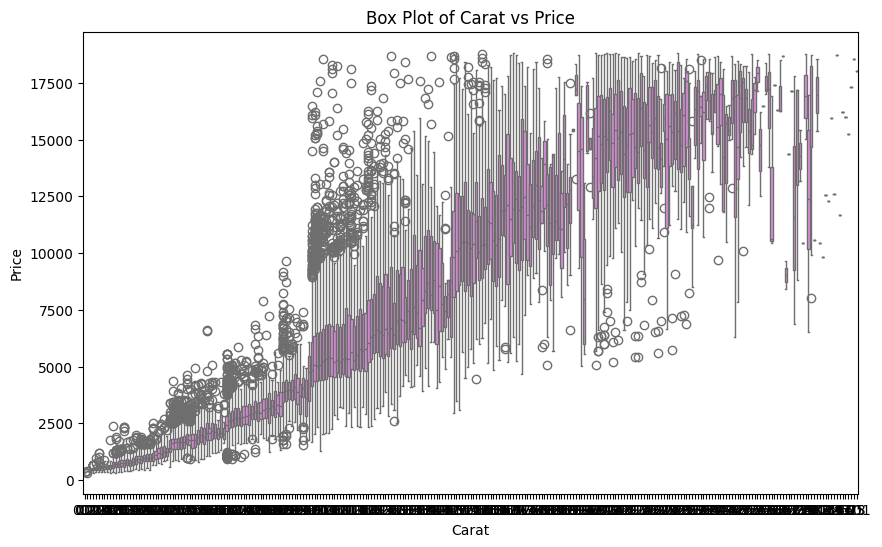

In [18]:
# Boxplot plot for cut  vs price

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='carat', y='price',color='violet')
plt.title('Box Plot of Carat vs Price')
plt.xlabel('Carat')
plt.ylabel('Price')
plt.show()

In [19]:
# Calculate the correlation matrix for numerical columns only
corr_matrix = df.select_dtypes(include=['float64', 'int64']).corr()
print(corr_matrix)

          carat     depth     table     price         x         y         z
carat  1.000000  0.028224  0.181618  0.921591  0.975094  0.951722  0.953387
depth  0.028224  1.000000 -0.295779 -0.010647 -0.025289 -0.029341  0.094924
table  0.181618 -0.295779  1.000000  0.127134  0.195344  0.183760  0.150929
price  0.921591 -0.010647  0.127134  1.000000  0.884435  0.865421  0.861249
x      0.975094 -0.025289  0.195344  0.884435  1.000000  0.974701  0.970772
y      0.951722 -0.029341  0.183760  0.865421  0.974701  1.000000  0.952006
z      0.953387  0.094924  0.150929  0.861249  0.970772  0.952006  1.000000


In [20]:
cov_matrix=df.select_dtypes(include=['float64', 'int64']).cov()
print(cov_matrix)

             carat      depth        table         price            x  \
carat     0.224687   0.019167     0.192365  1.742765e+03     0.518484   
depth     0.019167   2.052404    -0.946840 -6.085371e+01    -0.040641   
table     0.192365  -0.946840     4.992948  1.133318e+03     0.489643   
price  1742.765364 -60.853712  1133.318064  1.591563e+07  3958.021491   
x         0.518484  -0.040641     0.489643  3.958021e+03     1.258347   
y         0.515248  -0.048009     0.468972  3.943271e+03     1.248789   
z         0.318917   0.095968     0.237996  2.424713e+03     0.768487   

                 y            z  
carat     0.515248     0.318917  
depth    -0.048009     0.095968  
table     0.468972     0.237996  
price  3943.270810  2424.712613  
x         1.248789     0.768487  
y         1.304472     0.767320  
z         0.767320     0.498011  


In [29]:
var_matrix=df.select_dtypes(include=['float64', 'int64']).var()
print(var_matrix)

carat    2.246867e-01
depth    2.052404e+00
table    4.992948e+00
price    1.591563e+07
x        1.258347e+00
y        1.304472e+00
z        4.980109e-01
dtype: float64


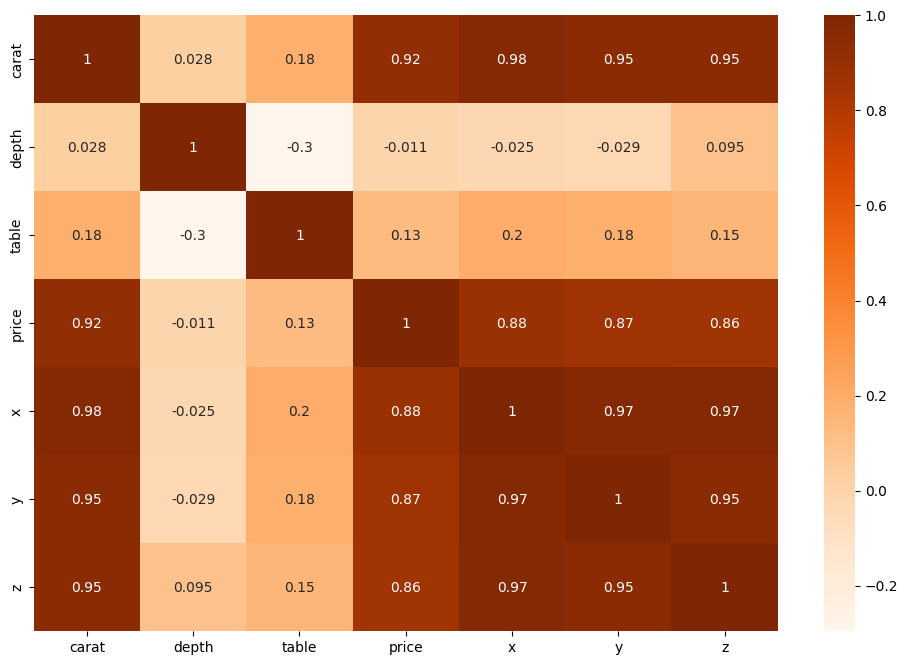

In [25]:
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='Oranges')
plt.show()

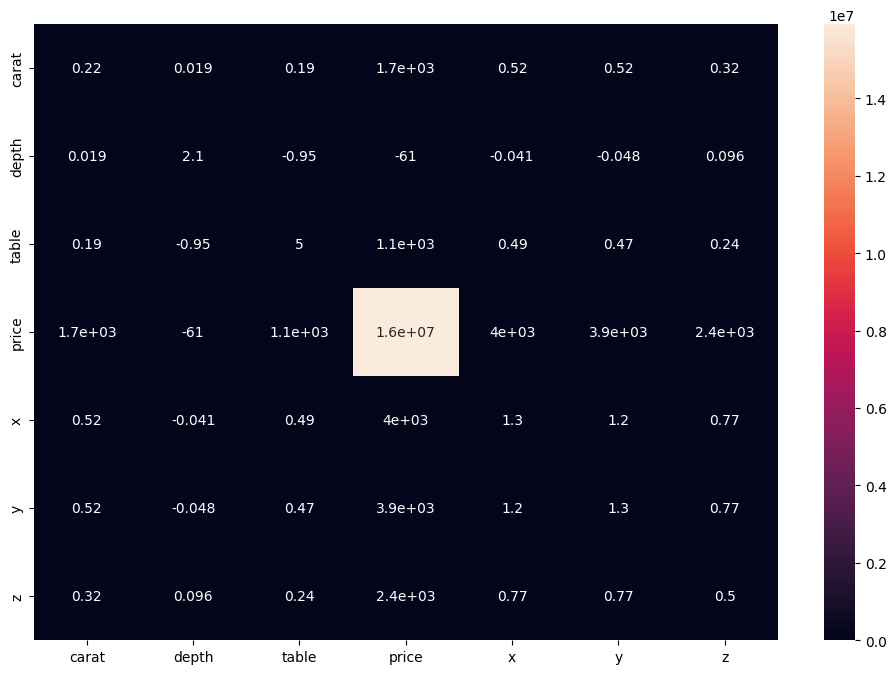

In [27]:
plt.figure(figsize=(12, 8))
sns.heatmap(cov_matrix, annot=True)
plt.show()

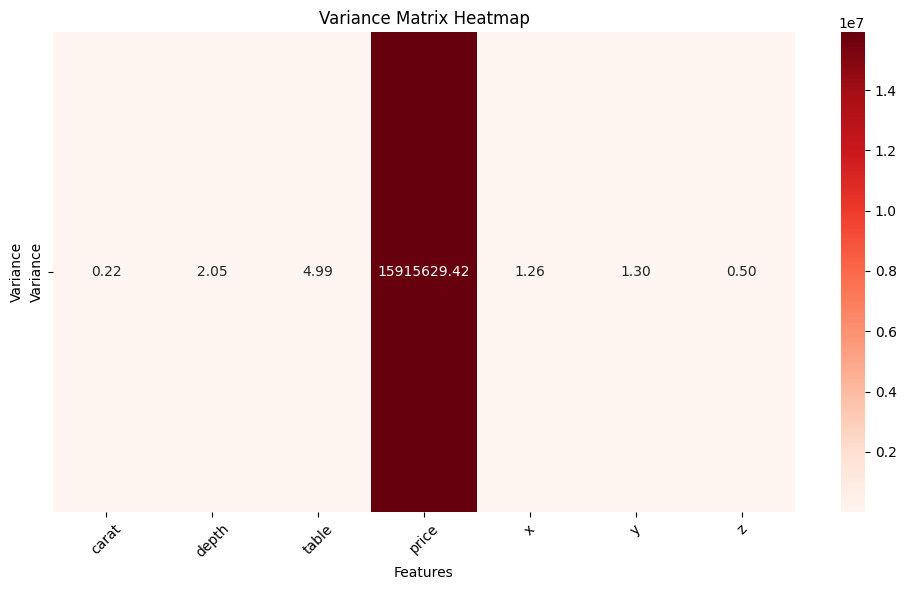

In [31]:
# Heatmap for variance matrix
plt.figure(figsize=(10, 6))
sns.heatmap(var_matrix.values.reshape(1, -1), 
            annot=True, 
            cmap='Reds', 
            xticklabels=var_matrix.index, 
            yticklabels=['Variance'],
            fmt='.2f')
plt.title('Variance Matrix Heatmap')
plt.xlabel('Features')
plt.ylabel('Variance')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [32]:
# Define numerical columns for outlier detection
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
print("Numerical columns for outlier detection:", numerical_cols)

Numerical columns for outlier detection: ['carat', 'depth', 'table', 'price', 'x', 'y', 'z']


In [33]:
# IQR Method for Outlier Detection

def detect_outliers_iqr(data):
    outliers = {}
    for col in numerical_cols:
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1
        
        # Calculate outlier bounds
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Find outliers
        outlier_mask = (data[col] < lower_bound) | (data[col] > upper_bound)
        outlier_indices = data[outlier_mask].index.tolist()
        
        outliers[col] = {
            'count': len(outlier_indices),
            'percentage': (len(outlier_indices) / len(data)) * 100,
            'indices': outlier_indices,
            'lower_bound': lower_bound,
            'upper_bound': upper_bound,
            'Q1': Q1,
            'Q3': Q3,
            'IQR': IQR
        }
    return outliers

# Detect outliers using IQR method
iqr_outliers = detect_outliers_iqr(df)

print("\nOutlier Detection using IQR Method:")
print("=" * 60)
for col, info in iqr_outliers.items():
    print(f"{col.capitalize()}:")
    print(f"  Outliers: {info['count']} ({info['percentage']:.2f}%)")
    print(f"  Q1: {info['Q1']:.2f}, Q3: {info['Q3']:.2f}, IQR: {info['IQR']:.2f}")
    print(f"  Bounds: [{info['lower_bound']:.2f}, {info['upper_bound']:.2f}]")
    print()


Outlier Detection using IQR Method:
Carat:
  Outliers: 1889 (3.50%)
  Q1: 0.40, Q3: 1.04, IQR: 0.64
  Bounds: [-0.56, 2.00]

Depth:
  Outliers: 2545 (4.72%)
  Q1: 61.00, Q3: 62.50, IQR: 1.50
  Bounds: [58.75, 64.75]

Table:
  Outliers: 605 (1.12%)
  Q1: 56.00, Q3: 59.00, IQR: 3.00
  Bounds: [51.50, 63.50]

Price:
  Outliers: 3540 (6.56%)
  Q1: 950.00, Q3: 5324.25, IQR: 4374.25
  Bounds: [-5611.38, 11885.62]

X:
  Outliers: 32 (0.06%)
  Q1: 4.71, Q3: 6.54, IQR: 1.83
  Bounds: [1.96, 9.29]

Y:
  Outliers: 29 (0.05%)
  Q1: 4.72, Q3: 6.54, IQR: 1.82
  Bounds: [1.99, 9.27]

Z:
  Outliers: 49 (0.09%)
  Q1: 2.91, Q3: 4.04, IQR: 1.13
  Bounds: [1.22, 5.73]



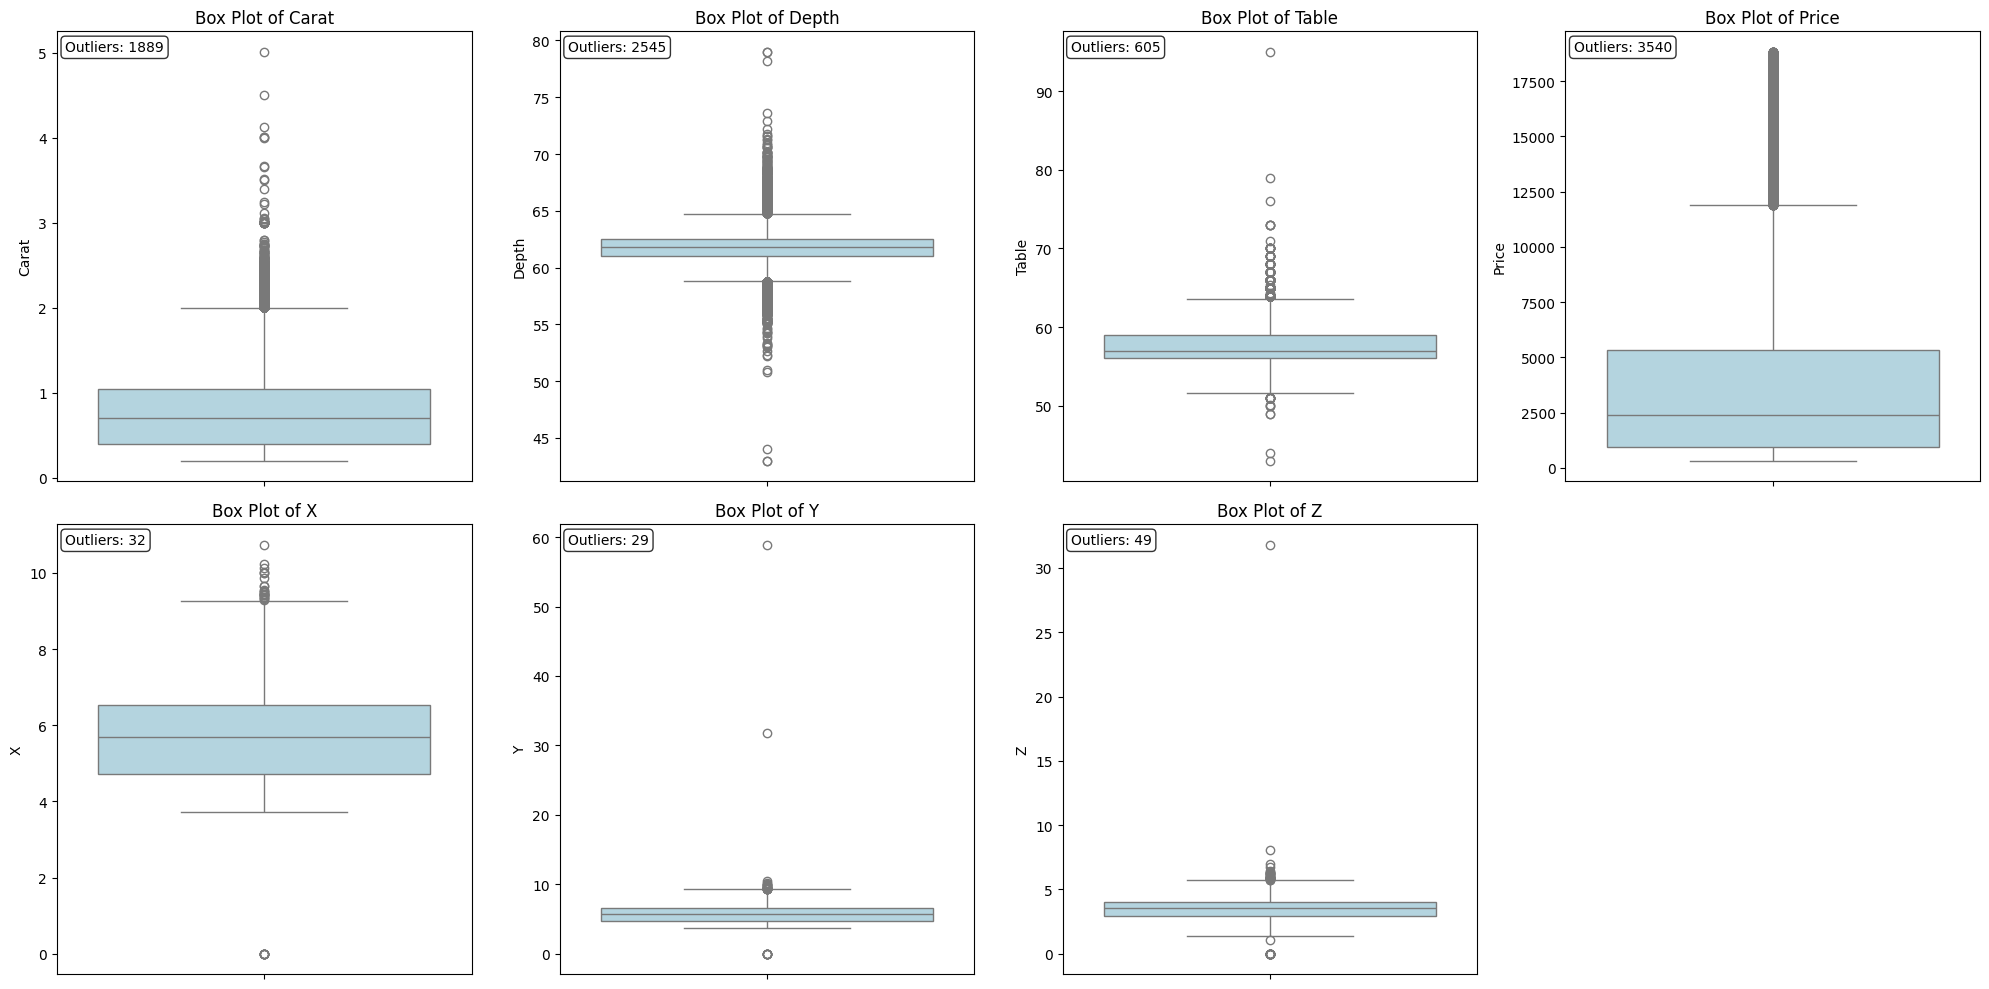

In [34]:
# Visualize outliers using boxplots
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
axes = axes.ravel()

for i, col in enumerate(numerical_cols):
    sns.boxplot(y=df[col], ax=axes[i], color='lightblue')
    axes[i].set_title(f'Box Plot of {col.capitalize()}')
    axes[i].set_ylabel(col.capitalize())
    
    # Add outlier count as text
    outlier_count = iqr_outliers[col]['count']
    axes[i].text(0.02, 0.98, f'Outliers: {outlier_count}', 
                transform=axes[i].transAxes, 
                verticalalignment='top',
                bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

# Remove empty subplot if any
if len(numerical_cols) < len(axes):
    fig.delaxes(axes[-1])

plt.tight_layout()
plt.show()

## 🔧 Feature Engineering

In [43]:
# 1. Log Transformation for Price (Target Variable)
# Since price is highly right-skewed, we'll apply log transformation to normalize it

# Create a copy of the dataset for feature engineering
df_engineered = df.copy()

# Apply log transformation to price (add 1 to handle any zero values)
df_engineered['log_price'] = np.log1p(df_engineered['price'])

print("Original Price Statistics:")
print(df['price'].describe())
print("\nLog-transformed Price Statistics:")
print(df_engineered['log_price'].describe())

Original Price Statistics:
count    53940.000000
mean      3932.799722
std       3989.439738
min        326.000000
25%        950.000000
50%       2401.000000
75%       5324.250000
max      18823.000000
Name: price, dtype: float64

Log-transformed Price Statistics:
count    53940.000000
mean         7.787424
std          1.014111
min          5.789960
25%          6.857514
50%          7.784057
75%          8.580215
max          9.842888
Name: log_price, dtype: float64


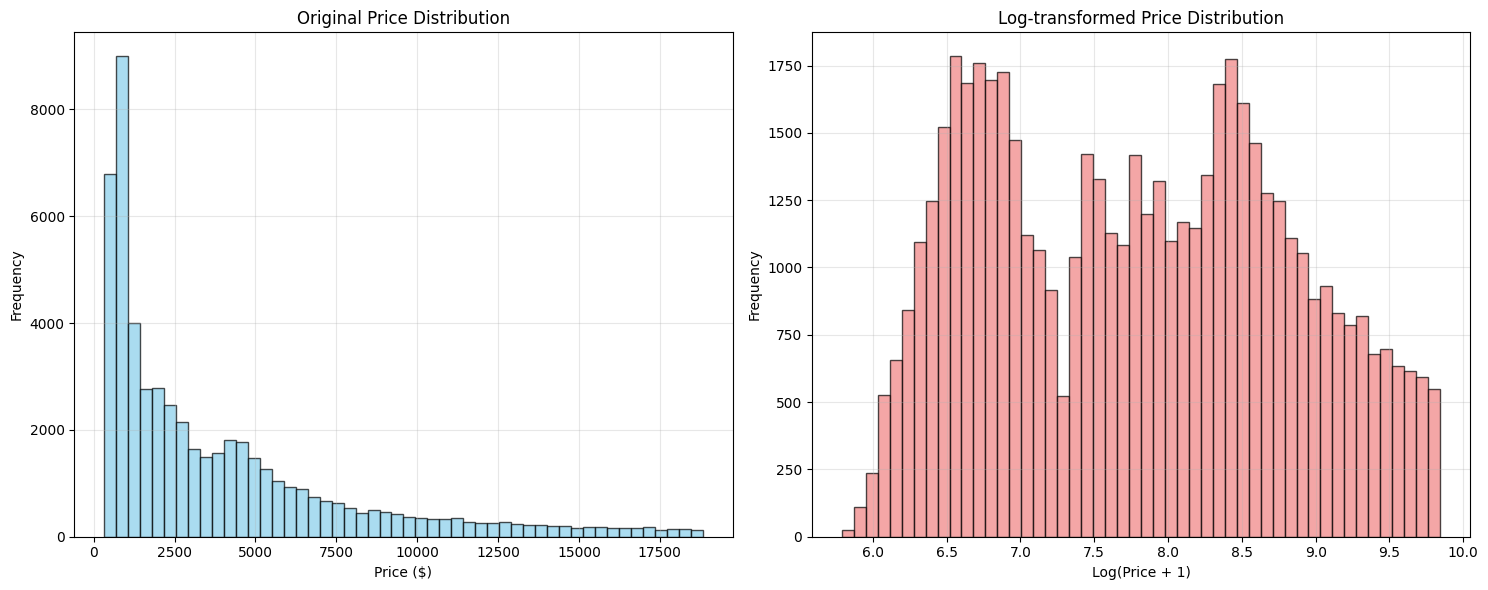


Skewness comparison:
Original price skewness: 1.6184
Log-transformed price skewness: 0.1159

Skewness reduction: 1.5024


In [44]:
# Visualize the transformation effect
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Original price distribution
axes[0].hist(df['price'], bins=50, color='skyblue', alpha=0.7, edgecolor='black')
axes[0].set_title('Original Price Distribution')
axes[0].set_xlabel('Price ($)')
axes[0].set_ylabel('Frequency')
axes[0].grid(True, alpha=0.3)

# Log-transformed price distribution
axes[1].hist(df_engineered['log_price'], bins=50, color='lightcoral', alpha=0.7, edgecolor='black')
axes[1].set_title('Log-transformed Price Distribution')
axes[1].set_xlabel('Log(Price + 1)')
axes[1].set_ylabel('Frequency')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Check skewness
from scipy.stats import skew
print(f"\nSkewness comparison:")
print(f"Original price skewness: {skew(df['price']):.4f}")
print(f"Log-transformed price skewness: {skew(df_engineered['log_price']):.4f}")
print(f"\nSkewness reduction: {abs(skew(df['price'])) - abs(skew(df_engineered['log_price'])):.4f}")

In [45]:
# 2. Create New Features from Existing Ones

# Volume of the diamond (approximation using x, y, z dimensions)
df_engineered['volume'] = df_engineered['x'] * df_engineered['y'] * df_engineered['z']

# Price per carat
df_engineered['price_per_carat'] = df_engineered['price'] / df_engineered['carat']

# Carat squared (polynomial feature)
df_engineered['carat_squared'] = df_engineered['carat'] ** 2

# Ratio features
df_engineered['depth_ratio'] = df_engineered['depth'] / df_engineered['table']
df_engineered['x_y_ratio'] = df_engineered['x'] / (df_engineered['y'] + 1e-6)  # Add small value to avoid division by zero
df_engineered['x_z_ratio'] = df_engineered['x'] / (df_engineered['z'] + 1e-6)

# Binned carat (categorical feature from numerical)
df_engineered['carat_category'] = pd.cut(df_engineered['carat'], 
                                       bins=[0, 0.5, 1.0, 1.5, 2.0, float('inf')], 
                                       labels=['Small', 'Medium', 'Large', 'Very Large', 'Exceptional'])

print("New features created:")
print("- volume: x * y * z")
print("- price_per_carat: price / carat")
print("- carat_squared: carat^2")
print("- depth_ratio: depth / table")
print("- x_y_ratio: x / y")
print("- x_z_ratio: x / z")
print("- carat_category: binned carat values")

print(f"\nDataset shape after feature engineering: {df_engineered.shape}")
print(f"New numerical features: {len(df_engineered.select_dtypes(include=['float64', 'int64']).columns) - len(df.select_dtypes(include=['float64', 'int64']).columns)}")

New features created:
- volume: x * y * z
- price_per_carat: price / carat
- carat_squared: carat^2
- depth_ratio: depth / table
- x_y_ratio: x / y
- x_z_ratio: x / z
- carat_category: binned carat values

Dataset shape after feature engineering: (53940, 18)
New numerical features: 7


In [46]:
# 3. Ordinal Encoding for Categorical Variables
# These features have natural ordering that should be preserved

from sklearn.preprocessing import LabelEncoder, OrdinalEncoder

# Define the ordinal mappings based on diamond quality rankings
cut_order = ['Fair', 'Good', 'Very Good', 'Premium', 'Ideal']
color_order = ['J', 'I', 'H', 'G', 'F', 'E', 'D']  # D is best (colorless), J is worst
clarity_order = ['I1', 'SI2', 'SI1', 'VS2', 'VS1', 'VVS2', 'VVS1', 'IF']  # IF is best (Internally Flawless)

# Create ordinal mappings
cut_mapping = {cut: idx + 1 for idx, cut in enumerate(cut_order)}
color_mapping = {color: idx + 1 for idx, color in enumerate(color_order)}
clarity_mapping = {clarity: idx + 1 for idx, clarity in enumerate(clarity_order)}

# Apply ordinal encoding
df_engineered['cut_ordinal'] = df_engineered['cut'].map(cut_mapping)
df_engineered['color_ordinal'] = df_engineered['color'].map(color_mapping)
df_engineered['clarity_ordinal'] = df_engineered['clarity'].map(clarity_mapping)

# Also keep the simple label encoding for comparison
le_cut = LabelEncoder()
le_color = LabelEncoder()
le_clarity = LabelEncoder()

df_engineered['cut_encoded'] = le_cut.fit_transform(df_engineered['cut'])
df_engineered['color_encoded'] = le_color.fit_transform(df_engineered['color'])
df_engineered['clarity_encoded'] = le_clarity.fit_transform(df_engineered['clarity'])

print("🏆 ORDINAL ENCODING (Quality-Based Rankings):")
print("=" * 60)

print("\n💎 Cut Quality (1=Worst, 5=Best):")
for cut, value in cut_mapping.items():
    count = len(df_engineered[df_engineered['cut'] == cut])
    print(f"  {cut:<12}: {value} (n={count:,})")

print("\n🌈 Color Grade (1=Worst/J, 7=Best/D):")
for color, value in color_mapping.items():
    count = len(df_engineered[df_engineered['color'] == color])
    print(f"  {color:<12}: {value} (n={count:,})")

print("\n🔍 Clarity Grade (1=Worst/I1, 8=Best/IF):")
for clarity, value in clarity_mapping.items():
    count = len(df_engineered[df_engineered['clarity'] == clarity])
    print(f"  {clarity:<12}: {value} (n={count:,})")

print("\n📊 ENCODING COMPARISON:")
print("-" * 40)
sample_data = df_engineered[['cut', 'cut_encoded', 'cut_ordinal', 'color', 'color_encoded', 'color_ordinal', 
                           'clarity', 'clarity_encoded', 'clarity_ordinal']].head(10)
print(sample_data)

print("\n✅ Benefits of Ordinal Encoding:")
print("• Preserves natural quality rankings")
print("• Reduces dimensionality vs one-hot encoding")
print("• XGBoost can learn quality hierarchies")
print("• Better performance for ordered categorical data")

🏆 ORDINAL ENCODING (Quality-Based Rankings):

💎 Cut Quality (1=Worst, 5=Best):
  Fair        : 1 (n=1,610)
  Good        : 2 (n=4,906)
  Very Good   : 3 (n=12,082)
  Premium     : 4 (n=13,791)
  Ideal       : 5 (n=21,551)

🌈 Color Grade (1=Worst/J, 7=Best/D):
  J           : 1 (n=2,808)
  I           : 2 (n=5,422)
  H           : 3 (n=8,304)
  G           : 4 (n=11,292)
  F           : 5 (n=9,542)
  E           : 6 (n=9,797)
  D           : 7 (n=6,775)

🔍 Clarity Grade (1=Worst/I1, 8=Best/IF):
  I1          : 1 (n=741)
  SI2         : 2 (n=9,194)
  SI1         : 3 (n=13,065)
  VS2         : 4 (n=12,258)
  VS1         : 5 (n=8,171)
  VVS2        : 6 (n=5,066)
  VVS1        : 7 (n=3,655)
  IF          : 8 (n=1,790)

📊 ENCODING COMPARISON:
----------------------------------------
         cut  cut_encoded cut_ordinal color  color_encoded color_ordinal  \
0      Ideal            2           5     E              1             6   
1    Premium            3           4     E              1  

📈 FEATURE CORRELATION ANALYSIS:
            Feature  Correlation_with_Price  Correlation_with_LogPrice
0             price                  1.0000                     1.0000
1             carat                  0.9216                     0.9580
2   price_per_carat                  0.9124                     0.9362
3            volume                  0.9024                     0.9352
4         log_price                  0.8959                     0.9203
5     carat_squared                  0.8909                     0.9008
6                 x                  0.8844                     0.9005
7                 y                  0.8654                     0.8959
8                 z                  0.8612                     0.7908
9             table                  0.1271                     0.1582
10        x_y_ratio                  0.0454                     0.0693
11        x_z_ratio                  0.0218                     0.0165
12            depth                 -0.0106  

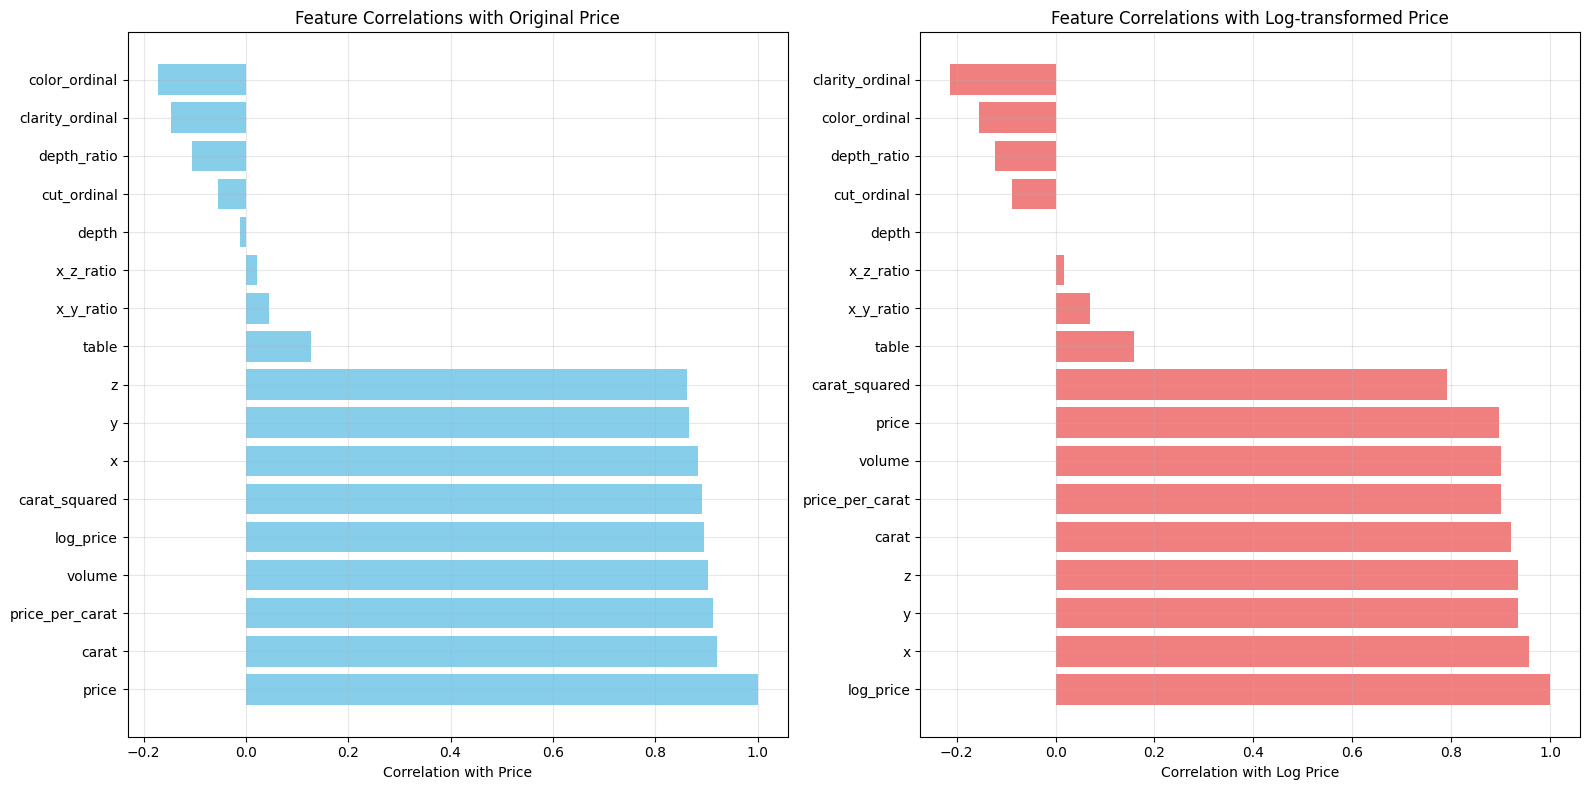

In [47]:
# 4. Analyze New Features' Correlation with Target Variable

# Select numerical features for correlation analysis (including ordinal encoded features)
numerical_features = ['carat', 'depth', 'table', 'x', 'y', 'z', 'price', 'log_price', 
                     'volume', 'price_per_carat', 'carat_squared', 'depth_ratio', 
                     'x_y_ratio', 'x_z_ratio', 'cut_ordinal', 'color_ordinal', 'clarity_ordinal']

# Calculate correlation with original price and log_price
corr_with_price = df_engineered[numerical_features].corrwith(df_engineered['price']).sort_values(ascending=False)
corr_with_log_price = df_engineered[numerical_features].corrwith(df_engineered['log_price']).sort_values(ascending=False)

# Create comparison DataFrame
feature_correlation = pd.DataFrame({
    'Feature': corr_with_price.index,
    'Correlation_with_Price': corr_with_price.values,
    'Correlation_with_LogPrice': corr_with_log_price.values
})

print("📈 FEATURE CORRELATION ANALYSIS:")
print("=" * 60)
print(feature_correlation.round(4))

# Compare ordinal vs label encoding correlations
print(f"\n🔍 ENCODING METHOD COMPARISON:")
print("-" * 40)
encoding_comparison = pd.DataFrame({
    'Feature': ['Cut', 'Color', 'Clarity'],
    'Ordinal_Correlation': [
        df_engineered[['cut_ordinal', 'price']].corr().iloc[0,1],
        df_engineered[['color_ordinal', 'price']].corr().iloc[0,1], 
        df_engineered[['clarity_ordinal', 'price']].corr().iloc[0,1]
    ],
    'Label_Correlation': [
        df_engineered[['cut_encoded', 'price']].corr().iloc[0,1],
        df_engineered[['color_encoded', 'price']].corr().iloc[0,1],
        df_engineered[['clarity_encoded', 'price']].corr().iloc[0,1]
    ]
})
encoding_comparison['Improvement'] = encoding_comparison['Ordinal_Correlation'] - encoding_comparison['Label_Correlation']
print(encoding_comparison.round(4))

# Visualize feature correlations
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

# Correlation with original price
axes[0].barh(range(len(corr_with_price)), corr_with_price.values, color='skyblue')
axes[0].set_yticks(range(len(corr_with_price)))
axes[0].set_yticklabels(corr_with_price.index, rotation=0)
axes[0].set_xlabel('Correlation with Price')
axes[0].set_title('Feature Correlations with Original Price')
axes[0].grid(True, alpha=0.3)

# Correlation with log price
axes[1].barh(range(len(corr_with_log_price)), corr_with_log_price.values, color='lightcoral')
axes[1].set_yticks(range(len(corr_with_log_price)))
axes[1].set_yticklabels(corr_with_log_price.index, rotation=0)
axes[1].set_xlabel('Correlation with Log Price')
axes[1].set_title('Feature Correlations with Log-transformed Price')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [48]:
# 5. Feature Engineering Summary

print("🔧 FEATURE ENGINEERING SUMMARY")
print("=" * 60)
print(f"Original dataset shape: {df.shape}")
print(f"Engineered dataset shape: {df_engineered.shape}")
print(f"New features added: {df_engineered.shape[1] - df.shape[1]}")

print("\n📊 KEY TRANSFORMATIONS:")
print("✓ Log transformation applied to price (reduces skewness)")
print("✓ Created volume feature (x * y * z)")
print("✓ Added price_per_carat ratio")
print("✓ Generated polynomial feature (carat_squared)")
print("✓ Created ratio features (depth_ratio, x_y_ratio, x_z_ratio)")
print("✓ Binned carat into categories")
print("✓ Applied ordinal encoding for categorical variables (preserves quality rankings)")
print("✓ Added label encoding for comparison")

print("\n🏆 ORDINAL ENCODING BENEFITS:")
print("• Cut: Fair(1) → Good(2) → Very Good(3) → Premium(4) → Ideal(5)")
print("• Color: J(1) → I(2) → H(3) → G(4) → F(5) → E(6) → D(7)")
print("• Clarity: I1(1) → SI2(2) → SI1(3) → VS2(4) → VS1(5) → VVS2(6) → VVS1(7) → IF(8)")
print("• Preserves natural quality hierarchies for better model learning")

print("\n🎯 BENEFITS FOR XGBOOST MODEL:")
print("• Log-transformed price improves model performance")
print("• Ordinal encoding preserves categorical feature rankings")
print("• New ratio and interaction features capture relationships")
print("• Enhanced feature set provides more predictive power")
print("• Tree-based models work optimally with ordinal encodings")

# Show final feature list organized by type
numeric_features = df_engineered.select_dtypes(include=['float64', 'int64']).columns.tolist()
categorical_features = df_engineered.select_dtypes(include=['object', 'category']).columns.tolist()

print(f"\n📋 FINAL FEATURE SET ({len(df_engineered.columns)} features):")
print(f"\n🔢 Numerical Features ({len(numeric_features)}):")
for i, col in enumerate(numeric_features, 1):
    print(f"{i:2d}. {col}")

print(f"\n📝 Categorical Features ({len(categorical_features)}):")
for i, col in enumerate(categorical_features, 1):
    print(f"{i:2d}. {col}")

# Recommend features for XGBoost model
recommended_features = ['carat', 'cut_ordinal', 'color_ordinal', 'clarity_ordinal', 
                       'depth', 'table', 'x', 'y', 'z', 'volume', 'carat_squared', 
                       'depth_ratio', 'x_y_ratio', 'x_z_ratio']

print(f"\n⭐ RECOMMENDED FEATURES FOR XGBOOST ({len(recommended_features)}):")
for i, col in enumerate(recommended_features, 1):
    print(f"{i:2d}. {col}")

# Check for any missing values in engineered features
missing_values = df_engineered.isnull().sum()
if missing_values.sum() > 0:
    print(f"\n⚠️  Missing values detected:")
    print(missing_values[missing_values > 0])
else:
    print(f"\n✅ No missing values in engineered dataset")

print(f"\n🎯 READY FOR MODEL TRAINING!")
print(f"Target variable: log_price (log-transformed price)")
print(f"Features ready for XGBoost regression model")

🔧 FEATURE ENGINEERING SUMMARY
Original dataset shape: (53940, 10)
Engineered dataset shape: (53940, 24)
New features added: 14

📊 KEY TRANSFORMATIONS:
✓ Log transformation applied to price (reduces skewness)
✓ Created volume feature (x * y * z)
✓ Added price_per_carat ratio
✓ Generated polynomial feature (carat_squared)
✓ Created ratio features (depth_ratio, x_y_ratio, x_z_ratio)
✓ Binned carat into categories
✓ Applied ordinal encoding for categorical variables (preserves quality rankings)
✓ Added label encoding for comparison

🏆 ORDINAL ENCODING BENEFITS:
• Cut: Fair(1) → Good(2) → Very Good(3) → Premium(4) → Ideal(5)
• Color: J(1) → I(2) → H(3) → G(4) → F(5) → E(6) → D(7)
• Clarity: I1(1) → SI2(2) → SI1(3) → VS2(4) → VS1(5) → VVS2(6) → VVS1(7) → IF(8)
• Preserves natural quality hierarchies for better model learning

🎯 BENEFITS FOR XGBOOST MODEL:
• Log-transformed price improves model performance
• Ordinal encoding preserves categorical feature rankings
• New ratio and interaction f

## ⚖️ Feature Scaling

In [49]:
# 1. Prepare Features for Scaling

# Select the recommended numerical features for scaling
features_to_scale = ['carat', 'depth', 'table', 'x', 'y', 'z', 'volume', 'carat_squared', 
                    'depth_ratio', 'x_y_ratio', 'x_z_ratio', 'cut_ordinal', 'color_ordinal', 'clarity_ordinal']

# Create a copy for scaling operations
df_scaled = df_engineered.copy()

print("🔍 FEATURES SELECTED FOR SCALING:")
print("=" * 50)
for i, feature in enumerate(features_to_scale, 1):
    print(f"{i:2d}. {feature}")

# Check the current scale of features
print(f"\n📊 CURRENT FEATURE SCALES:")
print("-" * 40)
scale_stats = df_scaled[features_to_scale].describe()
print(scale_stats.round(2))

🔍 FEATURES SELECTED FOR SCALING:
 1. carat
 2. depth
 3. table
 4. x
 5. y
 6. z
 7. volume
 8. carat_squared
 9. depth_ratio
10. x_y_ratio
11. x_z_ratio
12. cut_ordinal
13. color_ordinal
14. clarity_ordinal

📊 CURRENT FEATURE SCALES:
----------------------------------------
          carat     depth     table         x         y         z    volume  \
count  53940.00  53940.00  53940.00  53940.00  53940.00  53940.00  53940.00   
mean       0.80     61.75     57.46      5.73      5.73      3.54    129.85   
std        0.47      1.43      2.23      1.12      1.14      0.71     78.25   
min        0.20     43.00     43.00      0.00      0.00      0.00      0.00   
25%        0.40     61.00     56.00      4.71      4.72      2.91     65.14   
50%        0.70     61.80     57.00      5.70      5.71      3.53    114.81   
75%        1.04     62.50     59.00      6.54      6.54      4.04    170.84   
max        5.01     79.00     95.00     10.74     58.90     31.80   3840.60   

       carat

In [50]:
# 2. Apply Different Scaling Methods

from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, PowerTransformer
import warnings
warnings.filterwarnings('ignore')

# Initialize scalers
standard_scaler = StandardScaler()
minmax_scaler = MinMaxScaler()
robust_scaler = RobustScaler()
power_transformer = PowerTransformer(method='yeo-johnson', standardize=True)

# Apply Standard Scaling (Z-score normalization)
df_scaled[f'{features_to_scale[0]}_standard'] = standard_scaler.fit_transform(df_scaled[features_to_scale].iloc[:, [0]])
standard_scaled_features = [f'{feature}_standard' for feature in features_to_scale]
df_scaled[standard_scaled_features] = standard_scaler.fit_transform(df_scaled[features_to_scale])

# Apply Min-Max Scaling (0-1 normalization)
minmax_scaled_features = [f'{feature}_minmax' for feature in features_to_scale]
df_scaled[minmax_scaled_features] = minmax_scaler.fit_transform(df_scaled[features_to_scale])

# Apply Robust Scaling (median and IQR based)
robust_scaled_features = [f'{feature}_robust' for feature in features_to_scale]
df_scaled[robust_scaled_features] = robust_scaler.fit_transform(df_scaled[features_to_scale])

# Apply Power Transformation (Yeo-Johnson)
power_scaled_features = [f'{feature}_power' for feature in features_to_scale]
df_scaled[power_scaled_features] = power_transformer.fit_transform(df_scaled[features_to_scale])

print("✅ SCALING METHODS APPLIED:")
print("=" * 50)
print("🔢 Standard Scaler: Mean=0, Std=1 (Z-score normalization)")
print("📏 MinMax Scaler: Range=[0,1] (Min-Max normalization)")
print("🛡️ Robust Scaler: Median=0, uses IQR (outlier-resistant)")
print("⚡ Power Transformer: Yeo-Johnson + Standardization")

print(f"\n📈 DATASET EXPANSION:")
print(f"Original features: {len(features_to_scale)}")
print(f"After scaling: {len(features_to_scale) * 5} (original + 4 scaled versions)")
print(f"Total dataset shape: {df_scaled.shape}")

✅ SCALING METHODS APPLIED:
🔢 Standard Scaler: Mean=0, Std=1 (Z-score normalization)
📏 MinMax Scaler: Range=[0,1] (Min-Max normalization)
🛡️ Robust Scaler: Median=0, uses IQR (outlier-resistant)
⚡ Power Transformer: Yeo-Johnson + Standardization

📈 DATASET EXPANSION:
Original features: 14
After scaling: 70 (original + 4 scaled versions)
Total dataset shape: (53940, 80)


KeyError: 'price_per_carat_standard'

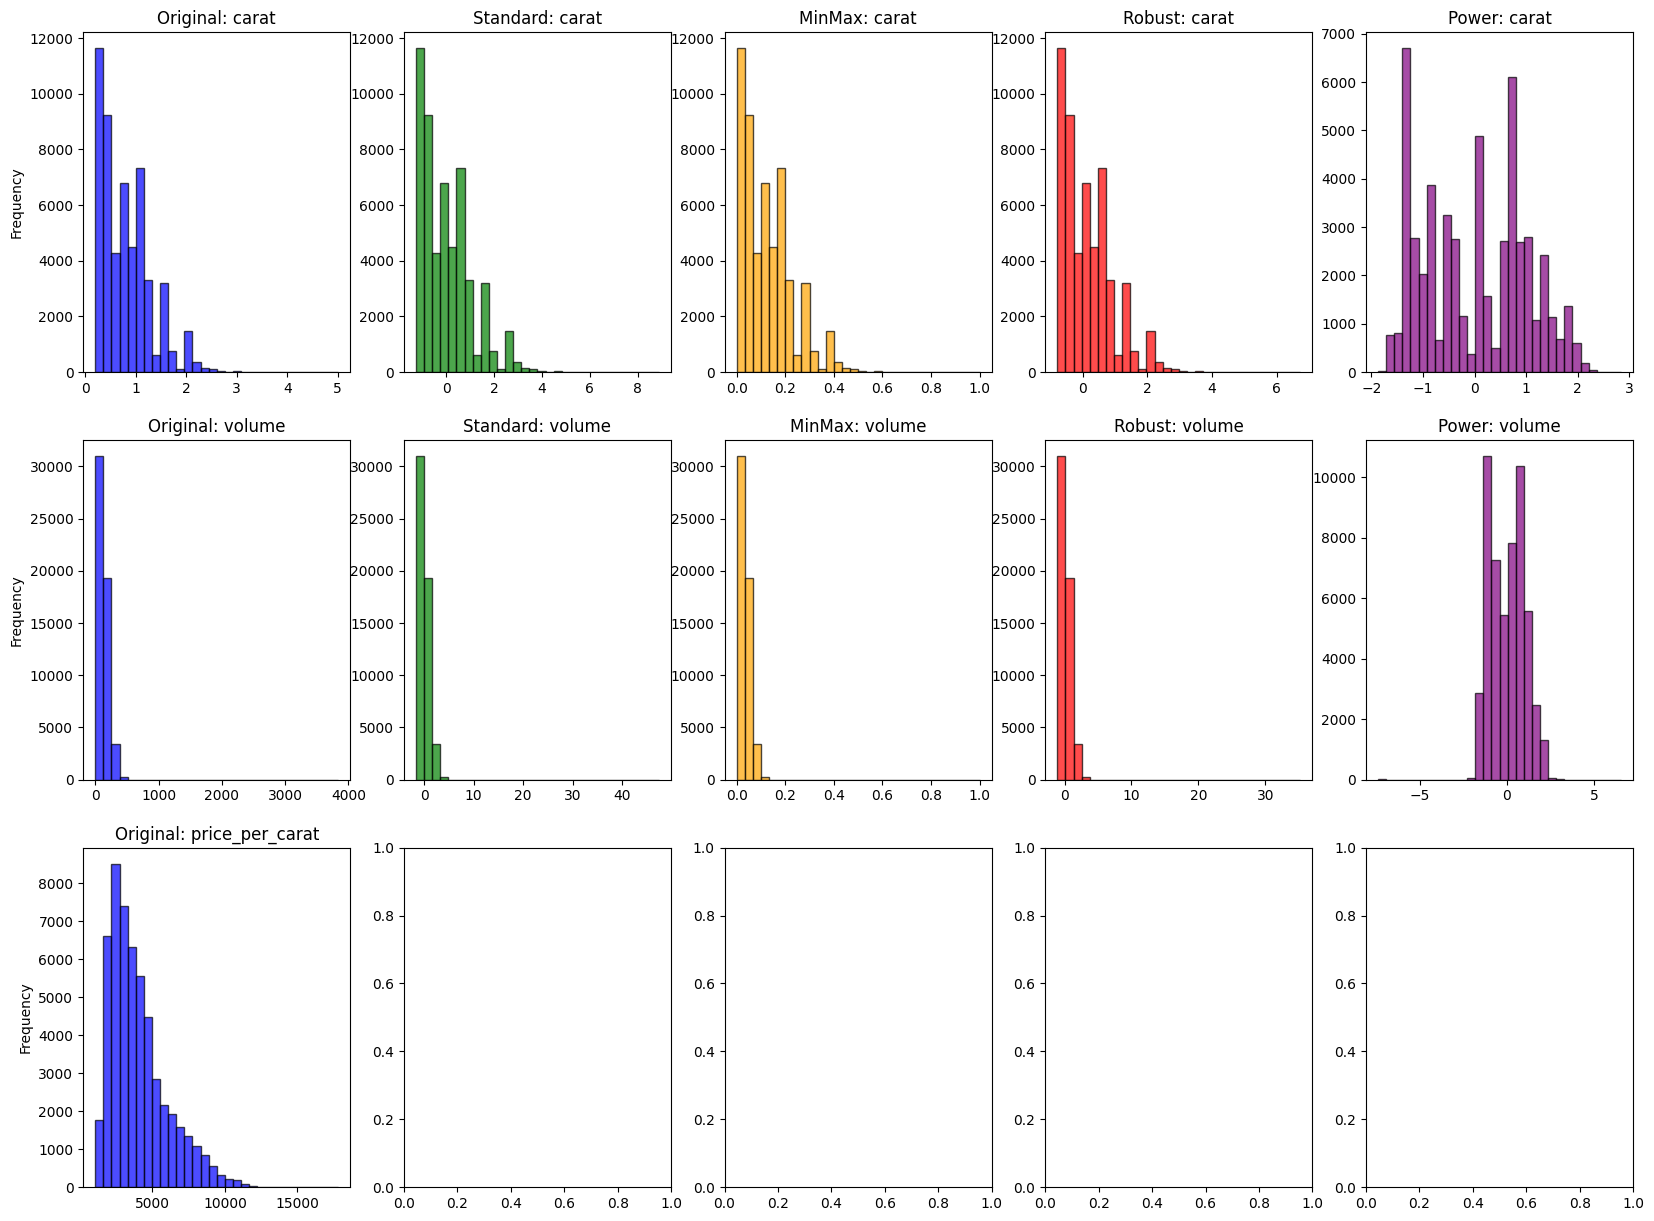

In [52]:
# 3. Visualize Scaling Effects

# Select a few representative features for visualization
sample_features = ['carat', 'volume', 'price_per_carat']

fig, axes = plt.subplots(3, 5, figsize=(20, 15))

for i, feature in enumerate(sample_features):
    # Original
    axes[i, 0].hist(df_scaled[feature], bins=30, alpha=0.7, color='blue', edgecolor='black')
    axes[i, 0].set_title(f'Original: {feature}')
    axes[i, 0].set_ylabel('Frequency')
    
    # Standard Scaled
    axes[i, 1].hist(df_scaled[f'{feature}_standard'], bins=30, alpha=0.7, color='green', edgecolor='black')
    axes[i, 1].set_title(f'Standard: {feature}')
    
    # MinMax Scaled
    axes[i, 2].hist(df_scaled[f'{feature}_minmax'], bins=30, alpha=0.7, color='orange', edgecolor='black')
    axes[i, 2].set_title(f'MinMax: {feature}')
    
    # Robust Scaled
    axes[i, 3].hist(df_scaled[f'{feature}_robust'], bins=30, alpha=0.7, color='red', edgecolor='black')
    axes[i, 3].set_title(f'Robust: {feature}')
    
    # Power Transformed
    axes[i, 4].hist(df_scaled[f'{feature}_power'], bins=30, alpha=0.7, color='purple', edgecolor='black')
    axes[i, 4].set_title(f'Power: {feature}')

plt.suptitle('Comparison of Scaling Methods', fontsize=16, y=0.98)
plt.tight_layout()
plt.show()

# Show statistics comparison
print("\n📊 SCALING STATISTICS COMPARISON:")
print("=" * 60)
for feature in sample_features[:2]:  # Show stats for first 2 features
    print(f"\n🔹 {feature.upper()}:")
    stats_df = pd.DataFrame({
        'Original': [df_scaled[feature].mean(), df_scaled[feature].std(), df_scaled[feature].min(), df_scaled[feature].max()],
        'Standard': [df_scaled[f'{feature}_standard'].mean(), df_scaled[f'{feature}_standard'].std(), 
                    df_scaled[f'{feature}_standard'].min(), df_scaled[f'{feature}_standard'].max()],
        'MinMax': [df_scaled[f'{feature}_minmax'].mean(), df_scaled[f'{feature}_minmax'].std(),
                  df_scaled[f'{feature}_minmax'].min(), df_scaled[f'{feature}_minmax'].max()],
        'Robust': [df_scaled[f'{feature}_robust'].mean(), df_scaled[f'{feature}_robust'].std(),
                  df_scaled[f'{feature}_robust'].min(), df_scaled[f'{feature}_robust'].max()],
        'Power': [df_scaled[f'{feature}_power'].mean(), df_scaled[f'{feature}_power'].std(),
                 df_scaled[f'{feature}_power'].min(), df_scaled[f'{feature}_power'].max()]
    }, index=['Mean', 'Std', 'Min', 'Max'])
    print(stats_df.round(4))

📈 CORRELATION IMPACT ANALYSIS:
Average absolute correlation with target variables:
                      Original  Standard  MinMax  Robust   Power
Price_Correlation       0.4292    0.4292  0.4292  0.4292  0.4171
LogPrice_Correlation    0.4475    0.4475  0.4475  0.4475  0.4713


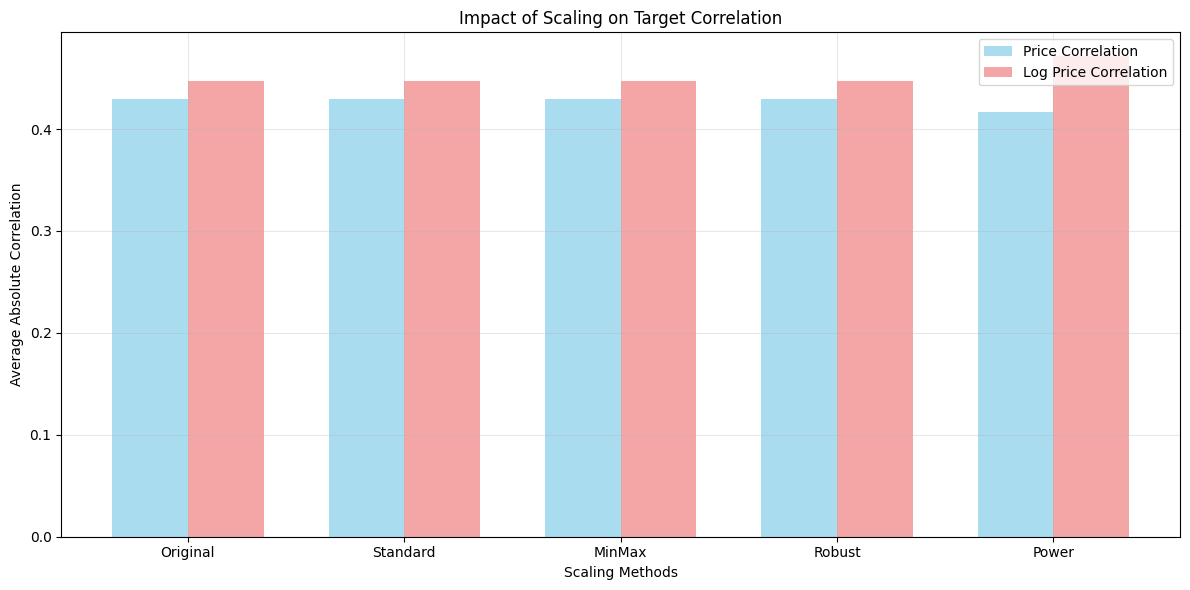


🏆 BEST SCALING METHODS:
For Price: Robust (correlation: 0.4292)
For Log Price: Power (correlation: 0.4713)


In [53]:
# 4. Analyze Correlation Impact of Scaling

# Calculate correlations with target for different scaling methods
target_correlations = pd.DataFrame({
    'Original': [df_scaled[features_to_scale].corrwith(df_scaled['price']).abs().mean(),
                df_scaled[features_to_scale].corrwith(df_scaled['log_price']).abs().mean()],
    'Standard': [df_scaled[standard_scaled_features].corrwith(df_scaled['price']).abs().mean(),
                df_scaled[standard_scaled_features].corrwith(df_scaled['log_price']).abs().mean()],
    'MinMax': [df_scaled[minmax_scaled_features].corrwith(df_scaled['price']).abs().mean(),
              df_scaled[minmax_scaled_features].corrwith(df_scaled['log_price']).abs().mean()],
    'Robust': [df_scaled[robust_scaled_features].corrwith(df_scaled['price']).abs().mean(),
              df_scaled[robust_scaled_features].corrwith(df_scaled['log_price']).abs().mean()],
    'Power': [df_scaled[power_scaled_features].corrwith(df_scaled['price']).abs().mean(),
             df_scaled[power_scaled_features].corrwith(df_scaled['log_price']).abs().mean()]
}, index=['Price_Correlation', 'LogPrice_Correlation'])

print("📈 CORRELATION IMPACT ANALYSIS:")
print("=" * 50)
print("Average absolute correlation with target variables:")
print(target_correlations.round(4))

# Visualize correlation comparison
fig, ax = plt.subplots(1, 1, figsize=(12, 6))
x_labels = target_correlations.columns
x_pos = np.arange(len(x_labels))

width = 0.35
ax.bar(x_pos - width/2, target_correlations.loc['Price_Correlation'], width, 
       label='Price Correlation', alpha=0.7, color='skyblue')
ax.bar(x_pos + width/2, target_correlations.loc['LogPrice_Correlation'], width,
       label='Log Price Correlation', alpha=0.7, color='lightcoral')

ax.set_xlabel('Scaling Methods')
ax.set_ylabel('Average Absolute Correlation')
ax.set_title('Impact of Scaling on Target Correlation')
ax.set_xticks(x_pos)
ax.set_xticklabels(x_labels)
ax.legend()
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Identify best scaling method
best_for_price = target_correlations.loc['Price_Correlation'].idxmax()
best_for_log_price = target_correlations.loc['LogPrice_Correlation'].idxmax()

print(f"\n🏆 BEST SCALING METHODS:")
print(f"For Price: {best_for_price} (correlation: {target_correlations.loc['Price_Correlation', best_for_price]:.4f})")
print(f"For Log Price: {best_for_log_price} (correlation: {target_correlations.loc['LogPrice_Correlation', best_for_log_price]:.4f})")

In [54]:
# 5. Feature Scaling Recommendations for XGBoost

print("🎯 FEATURE SCALING RECOMMENDATIONS FOR XGBOOST:")
print("=" * 60)

print("\n📋 SCALING METHOD CHARACTERISTICS:")
print("-" * 40)
scaling_info = pd.DataFrame({
    'Method': ['Original', 'Standard', 'MinMax', 'Robust', 'Power'],
    'Best_For': [
        'Tree-based models (XGBoost default)',
        'Linear models, neural networks',
        'When bounded range needed',
        'Data with outliers',
        'Skewed distributions'
    ],
    'XGBoost_Impact': [
        'Minimal - trees split on values',
        'Low - may help with regularization',
        'Low - may help with learning rate',
        'Medium - handles outliers better',
        'Medium - improves skewed features'
    ]
})

for i, row in scaling_info.iterrows():
    print(f"{row['Method']:12}: {row['Best_For']}")
    print(f"{'':14}XGBoost Impact: {row['XGBoost_Impact']}")
    print()

print("💡 RECOMMENDATIONS:")
print("-" * 20)
print("1. 🌟 For XGBoost: Original features are usually sufficient")
print("2. 🔧 Consider Robust scaling if you have many outliers")
print("3. ⚡ Power transformation can help with highly skewed features")
print("4. 📊 Standard/MinMax scaling may help with regularization tuning")

# Create final feature sets for different approaches
print(f"\n📦 PREPARED FEATURE SETS:")
print("-" * 30)

# Approach 1: Original features (recommended for XGBoost)
original_features_final = features_to_scale.copy()
print(f"1. Original Features ({len(original_features_final)} features):")
print(f"   {', '.join(original_features_final[:5])}...")

# Approach 2: Robust scaled (for outlier-heavy data)
robust_features_final = robust_scaled_features.copy()
print(f"2. Robust Scaled ({len(robust_features_final)} features):")
print(f"   {', '.join([f.replace('_robust', '') for f in robust_features_final[:5]])}... (robust scaled)")

# Approach 3: Mixed approach (original + power for skewed)
skewed_features = ['volume', 'price_per_carat', 'carat_squared']  # Highly skewed features
mixed_features = []
for feature in features_to_scale:
    if feature in skewed_features:
        mixed_features.append(f'{feature}_power')
    else:
        mixed_features.append(feature)

print(f"3. Mixed Approach ({len(mixed_features)} features):")
print(f"   Original + Power transformation for skewed features")

# Save scaler objects for future use
print(f"\n💾 SCALER OBJECTS SAVED:")
print("- standard_scaler: For Z-score normalization")
print("- minmax_scaler: For 0-1 normalization") 
print("- robust_scaler: For outlier-resistant scaling")
print("- power_transformer: For skewness reduction")

print(f"\n✅ SCALING ANALYSIS COMPLETE!")
print(f"Ready to proceed with model training using preferred feature set.")

🎯 FEATURE SCALING RECOMMENDATIONS FOR XGBOOST:

📋 SCALING METHOD CHARACTERISTICS:
----------------------------------------
Original    : Tree-based models (XGBoost default)
              XGBoost Impact: Minimal - trees split on values

Standard    : Linear models, neural networks
              XGBoost Impact: Low - may help with regularization

MinMax      : When bounded range needed
              XGBoost Impact: Low - may help with learning rate

Robust      : Data with outliers
              XGBoost Impact: Medium - handles outliers better

Power       : Skewed distributions
              XGBoost Impact: Medium - improves skewed features

💡 RECOMMENDATIONS:
--------------------
1. 🌟 For XGBoost: Original features are usually sufficient
2. 🔧 Consider Robust scaling if you have many outliers
3. ⚡ Power transformation can help with highly skewed features
4. 📊 Standard/MinMax scaling may help with regularization tuning

📦 PREPARED FEATURE SETS:
------------------------------
1. Original 

## 🎯 Model Preparation

In [ ]:
# 1. Select Features (X) and Target (y)

print("🔍 FEATURE AND TARGET SELECTION:")
print("=" * 50)

# Define the optimal feature set for XGBoost (based on our analysis)
# Using original features as they work best with tree-based models
selected_features = [
    'carat', 'cut_ordinal', 'color_ordinal', 'clarity_ordinal',
    'depth', 'table', 'x', 'y', 'z', 'volume', 'carat_squared',
    'depth_ratio', 'x_y_ratio', 'x_z_ratio'
]

# Alternative feature sets for experimentation
alternative_feature_sets = {
    'basic_features': ['carat', 'cut_ordinal', 'color_ordinal', 'clarity_ordinal', 'depth', 'table'],
    'extended_features': selected_features + ['price_per_carat'],  # Note: this creates data leakage
    'robust_scaled': [f'{feature}_robust' for feature in selected_features if feature in features_to_scale],
    'mixed_scaled': mixed_features  # From scaling analysis
}

print(f"🎯 PRIMARY FEATURE SET ({len(selected_features)} features):")
for i, feature in enumerate(selected_features, 1):
    print(f"{i:2d}. {feature}")

print(f"\n📊 ALTERNATIVE FEATURE SETS:")
for set_name, features in alternative_feature_sets.items():
    print(f"• {set_name}: {len(features)} features")

# Define target variable (log-transformed price)
target_variable = 'log_price'

print(f"\n🎯 TARGET VARIABLE:")
print(f"• Primary target: {target_variable} (log-transformed price)")
print(f"• Alternative target: price (original price - for comparison)")

# Create feature matrix (X) and target vector (y)
X = df_scaled[selected_features].copy()
y = df_scaled[target_variable].copy()

print(f"\n✅ FEATURE MATRIX AND TARGET CREATED:")
print(f"• X shape: {X.shape}")
print(f"• y shape: {y.shape}")
print(f"• Target statistics: mean={y.mean():.4f}, std={y.std():.4f}")

# Check for any missing values
print(f"\n🔍 DATA QUALITY CHECK:")
missing_in_X = X.isnull().sum().sum()
missing_in_y = y.isnull().sum()
print(f"• Missing values in X: {missing_in_X}")
print(f"• Missing values in y: {missing_in_y}")

if missing_in_X > 0 or missing_in_y > 0:
    print("⚠️  Missing values detected - need to handle before modeling")
else:
    print("✅ No missing values - ready for modeling")

In [ ]:
# 2. Train-Test Split (70/30)

from sklearn.model_selection import train_test_split

print("🚂 TRAIN-TEST SPLIT:")
print("=" * 40)

# Split the data (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.3, 
    random_state=42, 
    stratify=None  # For regression, we don't stratify
)

print(f"📊 DATASET SPLIT SUMMARY:")
print(f"• Total samples: {len(X):,}")
print(f"• Training samples: {len(X_train):,} ({len(X_train)/len(X)*100:.1f}%)")
print(f"• Testing samples: {len(X_test):,} ({len(X_test)/len(X)*100:.1f}%)")

print(f"\n🔢 TRAINING SET:")
print(f"• X_train shape: {X_train.shape}")
print(f"• y_train shape: {y_train.shape}")
print(f"• y_train range: [{y_train.min():.4f}, {y_train.max():.4f}]")
print(f"• y_train mean: {y_train.mean():.4f}")

print(f"\n🧪 TESTING SET:")
print(f"• X_test shape: {X_test.shape}")
print(f"• y_test shape: {y_test.shape}")
print(f"• y_test range: [{y_test.min():.4f}, {y_test.max():.4f}]")
print(f"• y_test mean: {y_test.mean():.4f}")

# Verify the split maintains data distribution
print(f"\n📈 DISTRIBUTION COMPARISON:")
print(f"• Original target mean: {y.mean():.4f}")
print(f"• Train target mean: {y_train.mean():.4f}")
print(f"• Test target mean: {y_test.mean():.4f}")
print(f"• Mean difference (train-test): {abs(y_train.mean() - y_test.mean()):.4f}")

# Visualize the split
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Original distribution
axes[0].hist(y, bins=30, alpha=0.7, color='blue', edgecolor='black')
axes[0].set_title('Original Target Distribution')
axes[0].set_xlabel('Log Price')
axes[0].set_ylabel('Frequency')
axes[0].grid(True, alpha=0.3)

# Training set distribution
axes[1].hist(y_train, bins=30, alpha=0.7, color='green', edgecolor='black')
axes[1].set_title('Training Set Distribution')
axes[1].set_xlabel('Log Price')
axes[1].set_ylabel('Frequency')
axes[1].grid(True, alpha=0.3)

# Testing set distribution
axes[2].hist(y_test, bins=30, alpha=0.7, color='orange', edgecolor='black')
axes[2].set_title('Testing Set Distribution')
axes[2].set_xlabel('Log Price')
axes[2].set_ylabel('Frequency')
axes[2].grid(True, alpha=0.3)

plt.suptitle('Train-Test Split Distribution Comparison', fontsize=14)
plt.tight_layout()
plt.show()

In [ ]:
# 3. Feature Analysis and Correlation Matrix

print("🔍 FINAL FEATURE ANALYSIS:")
print("=" * 50)

# Analyze feature correlations in training set
feature_correlations = X_train.corr()

# Find highly correlated features (potential multicollinearity)
high_corr_pairs = []
for i in range(len(feature_correlations.columns)):
    for j in range(i+1, len(feature_correlations.columns)):
        if abs(feature_correlations.iloc[i, j]) > 0.8:  # Threshold for high correlation
            high_corr_pairs.append((
                feature_correlations.columns[i],
                feature_correlations.columns[j],
                feature_correlations.iloc[i, j]
            ))

print(f"🔗 HIGHLY CORRELATED FEATURE PAIRS (|correlation| > 0.8):")
if high_corr_pairs:
    for feat1, feat2, corr in high_corr_pairs:
        print(f"• {feat1} ↔ {feat2}: {corr:.4f}")
else:
    print("• No highly correlated pairs found")

# Feature importance based on correlation with target
feature_target_corr = X_train.corrwith(y_train).abs().sort_values(ascending=False)

print(f"\n📊 FEATURE IMPORTANCE (by correlation with target):")
for i, (feature, corr) in enumerate(feature_target_corr.items(), 1):
    print(f"{i:2d}. {feature:<15}: {corr:.4f}")

# Visualize correlation matrix
plt.figure(figsize=(12, 10))
mask = np.triu(np.ones_like(feature_correlations, dtype=bool))  # Mask upper triangle
sns.heatmap(feature_correlations, 
           mask=mask,
           annot=True, 
           cmap='RdBu_r', 
           center=0,
           square=True,
           fmt='.2f',
           cbar_kws={"shrink": .8})
plt.title('Feature Correlation Matrix (Training Set)')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# Feature statistics
print(f"\n📈 FEATURE STATISTICS (Training Set):")
print("-" * 40)
feature_stats = X_train.describe()
print(feature_stats.round(4))

In [ ]:
# 4. Model Preparation Summary and Validation

print("🎯 MODEL PREPARATION SUMMARY:")
print("=" * 60)

# Create summary DataFrame
preparation_summary = pd.DataFrame({
    'Component': [
        'Original Dataset',
        'Engineered Dataset', 
        'Selected Features',
        'Target Variable',
        'Training Set',
        'Testing Set'
    ],
    'Details': [
        f'{df.shape[0]:,} samples, {df.shape[1]} features',
        f'{df_engineered.shape[0]:,} samples, {df_engineered.shape[1]} features',
        f'{len(selected_features)} features (optimized for XGBoost)',
        f'{target_variable} (log-transformed price)',
        f'{X_train.shape[0]:,} samples ({X_train.shape[0]/len(X)*100:.1f}%)',
        f'{X_test.shape[0]:,} samples ({X_test.shape[0]/len(X)*100:.1f}%)'
    ]
})

print(preparation_summary.to_string(index=False))

print(f"\n📋 SELECTED FEATURES FOR XGBOOST MODEL:")
print("-" * 50)
feature_categories = {
    'Diamond Properties': ['carat', 'carat_squared'],
    'Quality Grades': ['cut_ordinal', 'color_ordinal', 'clarity_ordinal'],
    'Physical Dimensions': ['depth', 'table', 'x', 'y', 'z'],
    'Engineered Features': ['volume', 'depth_ratio', 'x_y_ratio', 'x_z_ratio']
}

for category, features in feature_categories.items():
    category_features = [f for f in features if f in selected_features]
    print(f"• {category}: {category_features}")

print(f"\n🎯 TARGET VARIABLE CHARACTERISTICS:")
print(f"• Variable: {target_variable}")
print(f"• Type: Continuous (regression problem)")
print(f"• Transformation: Log(price + 1)")
print(f"• Range: [{y.min():.4f}, {y.max():.4f}]")
print(f"• Distribution: More normal after log transformation")

print(f"\n✅ PRE-MODELING VALIDATION CHECKLIST:")
validation_checks = [
    ("No missing values in features", X_train.isnull().sum().sum() == 0),
    ("No missing values in target", y_train.isnull().sum() == 0),
    ("Sufficient training samples", len(X_train) > 1000),
    ("Balanced train-test split", abs(len(X_train) - 0.7*len(X)) < 100),
    ("Features are numeric", all(X_train.dtypes != 'object')),
    ("Target is continuous", y_train.dtype in ['float64', 'int64'])
]

for check, passed in validation_checks:
    status = "✅" if passed else "❌"
    print(f"{status} {check}")

# Alternative datasets for experimentation
print(f"\n🧪 ALTERNATIVE DATASETS PREPARED:")
print("-" * 40)

# Create alternative X matrices for comparison
X_basic = df_scaled[alternative_feature_sets['basic_features']].copy()
X_robust = df_scaled[[f for f in alternative_feature_sets['robust_scaled'] 
                     if f in df_scaled.columns]].copy()

print(f"• X_basic: {X_basic.shape} (basic features only)")
print(f"• X (primary): {X.shape} (optimized feature set)")  
print(f"• X_robust: {X_robust.shape} (robust scaled features)")

# Save preparation info for model training
model_config = {
    'feature_names': selected_features,
    'target_name': target_variable,
    'n_features': len(selected_features),
    'n_train_samples': len(X_train),
    'n_test_samples': len(X_test),
    'target_transform': 'log1p',
    'split_random_state': 42
}

print(f"\n💾 MODEL CONFIGURATION SAVED:")
for key, value in model_config.items():
    print(f"• {key}: {value}")

print(f"\n🚀 READY FOR XGBOOST MODEL TRAINING!")
print(f"• Features: X_train, X_test")
print(f"• Target: y_train, y_test") 
print(f"• Model type: XGBoost Regression")
print(f"• Objective: Minimize RMSE on log-transformed prices")